In [1]:
# configures the notebook to show plots inside it
%matplotlib inline

import utility

# Chapter 2
# Descriptive Statistics: What do we Know about the Data?

## Loading and Selecting Data

In [2]:
import pandas as pd

data = pd.read_csv("../datasets/PimaIndiansDiabetes.csv")

# referencing a variable like that dumps its value to stdout
# notebooks capture that and attempt to print it in a pretty form
data

,Pregnancy Count,Blood Glucose,Diastolic BP,Triceps Skin Fold Thickness,Serum Insulin,BMI,Diabetes Pedigree Function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Selecting with indices and slices 

In [3]:
first_row = data.loc[0]
fifth_row_pregnancy_count = data.loc[4, "Pregnancy Count"]
third_row_first_3_cols = data.loc[3, "Pregnancy Count":"Diastolic BP"]

first_10_rows = data.loc[:9]
second_10_rows_blood_glucose = data.loc[10:19, "Blood Glucose"]
first_6_rows_first_3_cols = data.loc[:5, "Pregnancy Count":"Diastolic BP"]

all_blood_glucose = data.loc[:, "Blood Glucose"]

In [4]:
# Use this cell to print the values of the selections above
# Printing all of them together would be messy, it's better to expirement with each single one here

print(third_row_first_3_cols)

Pregnancy Count     1.0
Blood Glucose      89.0
Diastolic BP       66.0
Name: 3, dtype: float64


### Selecting from 1D `Series`

In [5]:
blood_glucose_in_first_row = first_row.loc["Blood Glucose"]
first_3_cols_in_first_row = first_row.loc["Pregnancy Count":"Diastolic BP"]

fifth_row_in_blood_glucose_column = all_blood_glucose.loc[4]
first_10_rows_in_blood_glucose = all_blood_glucose.loc[0:9]

In [6]:
# Use this cell to print the values of the variables above

print(blood_glucose_in_first_row)

148.0


### Selecting with lists of labels

In [7]:
columns_of_interest = ["BMI", "Class"]
data_of_interest = data.loc[:, columns_of_interest]

data_of_interest

,BMI,Class
0,33.6,1
1,26.6,0
2,23.3,1
3,28.1,0
4,43.1,1
5,25.6,0
6,31.0,1
7,35.3,0
8,30.5,1
9,0.0,1


## Descriptive Statistics

### Mean, Mode, and Median

In [8]:
mean_values = data_of_interest.mean()
mean_values

BMI      31.992578
Class     0.348958
dtype: float64

In [9]:
mode_values = data_of_interest.mode()
mode_values

,BMI,Class
0,32.0,0


In [10]:
median_values = data_of_interest.median()
median_values

BMI      32.0
Class     0.0
dtype: float64

### Min-max ranges

In [11]:
min_values = data_of_interest.min()
max_values = data_of_interest.max()

print(min_values)
print("")
print(max_values)

BMI      0.0
Class    0.0
dtype: float64

BMI      67.1
Class     1.0
dtype: float64


### Selecting from a `DataFrame` using boolean sequences

In [12]:
rows_count, cols_count = data.shape

rows_mask = [True] * 10 + [False] * (rows_count - 10)
cols_mask = [True] * 2 + [False] * (cols_count - 2)

first_10_rows_first_2_cols = data.loc[rows_mask, cols_mask]

In [13]:
first_10_rows_first_2_cols

,Pregnancy Count,Blood Glucose
0,6,148
1,1,85
2,8,183
3,1,89
4,0,137
5,5,116
6,3,78
7,10,115
8,2,197
9,8,125


### Cleaning the data

#### Creating the boolean mask using element-wise comparison

In [14]:
bmi_zeros_mask = data_of_interest.loc[:, "BMI"] != 0

#### Selecting clean data

In [15]:
clean_data_of_interest = data_of_interest.loc[bmi_zeros_mask]

#### Re-calculting Statistics

In [16]:
mean_values = clean_data_of_interest.mean()
mean_values

BMI      32.457464
Class     0.351387
dtype: float64

In [17]:
mode_values = clean_data_of_interest.mode()
mode_values

,BMI,Class
0,32.0,0


In [18]:
median_values = clean_data_of_interest.median()
median_values

BMI      32.3
Class     0.0
dtype: float64

In [19]:
min_values = clean_data_of_interest.min()
max_values = clean_data_of_interest.max()

print(min_values)
print("")
print(max_values)

BMI      18.2
Class     0.0
dtype: float64

BMI      67.1
Class     1.0
dtype: float64


### Quartiles and boxplot

       BMI  Class
0.25  27.5    0.0
0.50  32.3    0.0
0.75  36.6    1.0


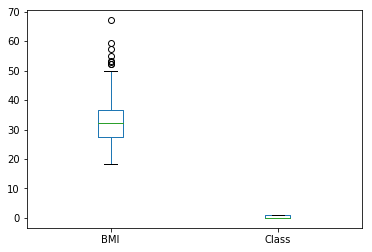

In [20]:
quartiles = clean_data_of_interest.quantile([0.25, 0.5, 0.75])

print(quartiles)
clean_data_of_interest.plot.box()

### Sample variance, and sample standard deviation

In [21]:
sample_vars = clean_data_of_interest.var()
sample_stds = clean_data_of_interest.std()

print(sample_vars)
print("")
print(sample_stds)

BMI      47.955463
Class     0.228216
dtype: float64

BMI      6.924988
Class    0.477719
dtype: float64


### Histogram Plots

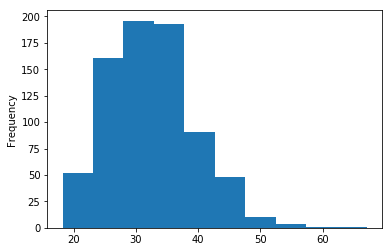

In [22]:
clean_data_of_interest.loc[:, "BMI"].plot.hist()

#### How much data within 1.5 std?

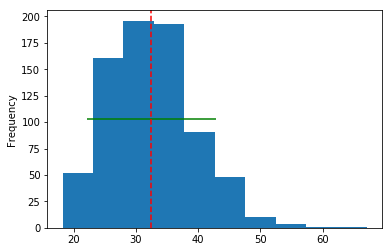

In [23]:
"""
The function called here baiscally plots the histogram as
before and then plots a vertical dashed red line crossing
the mean value and a horizontal error-bar centered at the
mean line reaching for a length of 1.5 std in each direction

The details of this method is outside the scope of the book 
for now if it's your first time doing these stuff. You can 
come back at later time and check the implementation of the 
method if you like.
"""

utility.plot_histogram_with_descriptive_stats(clean_data_of_interest.loc[:, "BMI"], 1.5)

#### Desnity Histogram

Text(0,0.5,'Density')

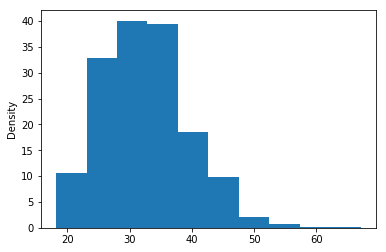

In [24]:
bin_size = 4.89 # the bin size in the 10 bins histogram

data_size = len(clean_data_of_interest.loc[:, "BMI"])
weights_seq = [1 / bin_size] * data_size


clean_data_of_interest.loc[:, "BMI"].plot.hist(weights=weights_seq) \
.set_ylabel("Density") # changes the label on y-axis

#### Histogram with Freedman-Diaconis bin size

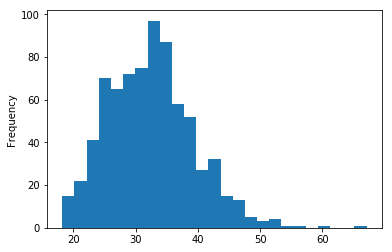

In [25]:
clean_data_of_interest.loc[:, "BMI"].plot.hist(bins='fd')